***MOVIE RATING PREDICTION***

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading or loading data
movie=pd.read_csv('movies.csv',encoding='latin1')

In [5]:
movie.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
movie.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [8]:
movie.shape

(15509, 10)

In [12]:
movie.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


<Axes: >

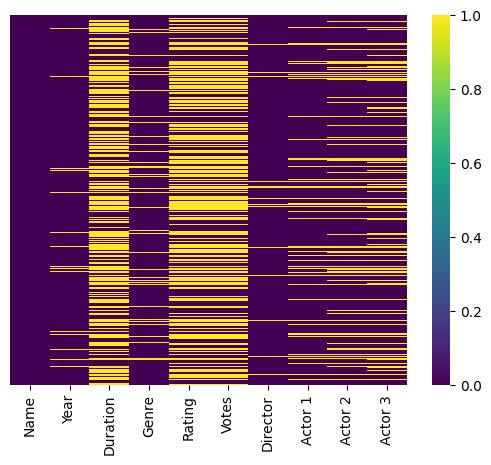

In [11]:
sns.heatmap(movie.isnull(),yticklabels=False,cmap='viridis')

In [13]:
movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [15]:
#replacing null values as 'unknown' in year column
movie.fillna({'Year':'Unknown'},inplace=True)
movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,Unknown,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
movie.dtypes


Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [41]:
#replacing null values in rating column by calculating median
movie['Rating']=movie['Rating'].fillna(movie['Rating'].median())
movie['Year']=movie['Year'].astype(str).str.extract(r'(\d{4})')
movie['Year']=pd.to_numeric(movie['Year'],errors='coerce')
movie['Votes']=movie['Votes'].fillna(movie['Votes'].median())
movie.fillna({'Director':'Unknown'},inplace=True)
movie.fillna({'Genre':'Unknown'},inplace=True)
movie.fillna({'Actor 1':'Unknown','Actor 2':'Unknown','Actor 3':'Unknown'},inplace=True)
movie

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991,Drama,6.0,35.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,"Drama, Musical",6.0,35.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,Drama,6.0,35.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005,Action,6.0,35.0,Kiran Thej,Sangeeta Tiwari,Unknown,Unknown
15507,Zulmi Shikari,1988,Action,6.0,35.0,Unknown,Unknown,Unknown,Unknown


In [42]:
movie.isnull().sum()

Name        0
Year        0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

***EDA***

***Distribution of Ratings***

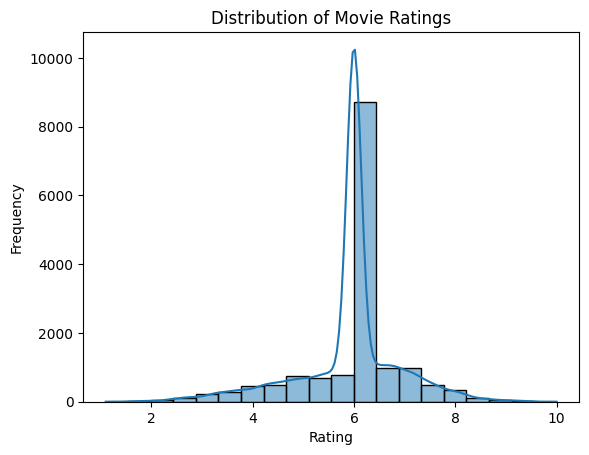

In [43]:
sns.histplot(movie['Rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

***Top Movie Genres***

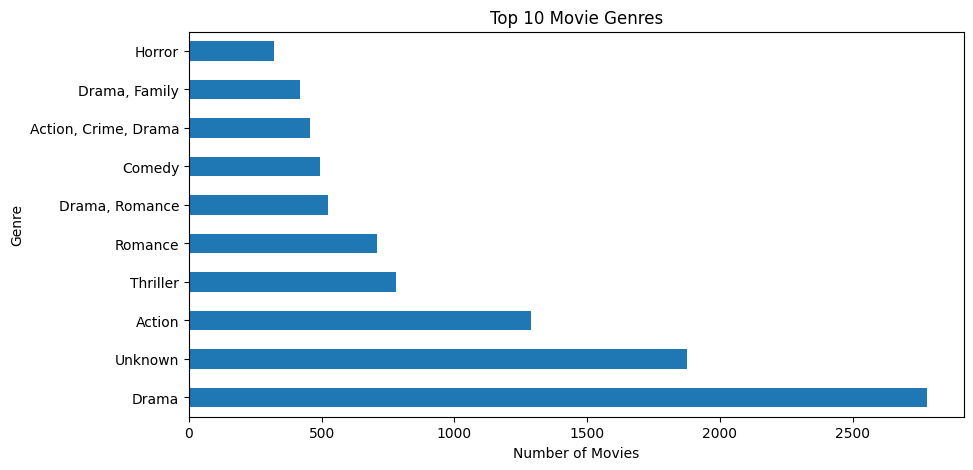

In [44]:
movie['Genre'].value_counts().head(10).plot(kind='barh', figsize=(10,5))
plt.title("Top 10 Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()


***Correlation Between Features***

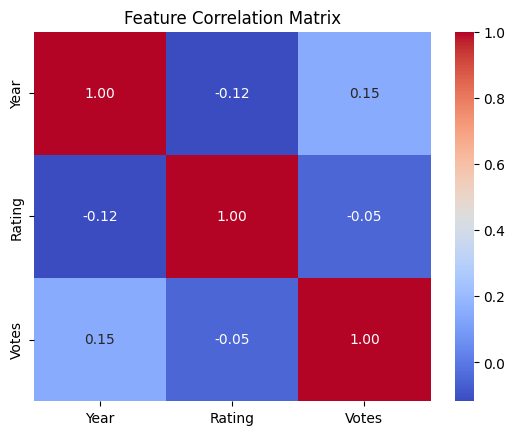

In [45]:
correlation_matrix = movie.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


**Count of Movies by Rating Category**

C:\Users\WORK\AppData\Local\Temp\ipykernel_16492\3792617841.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rating_bins, palette="pastel")


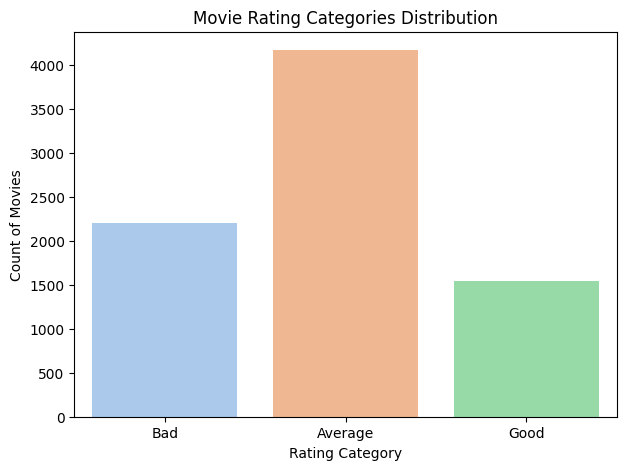

In [6]:
rating_bins = pd.cut(movie["Rating"], bins=[0, 5, 7, 10], labels=["Bad", "Average", "Good"])
plt.figure(figsize=(7, 5))
sns.countplot(x=rating_bins, palette="pastel")
plt.xlabel("Rating Category")
plt.ylabel("Count of Movies")
plt.title("Movie Rating Categories Distribution")
plt.show()